In [1]:
from phi.flow import *

# (1) Tensors Representing Physical Data

/home/matteot/anaconda3/envs/personal/lib/python3.12/site-packages/phi/field/_field.py:142: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, Grid)


<Figure size 1200x500 with 1 Axes>

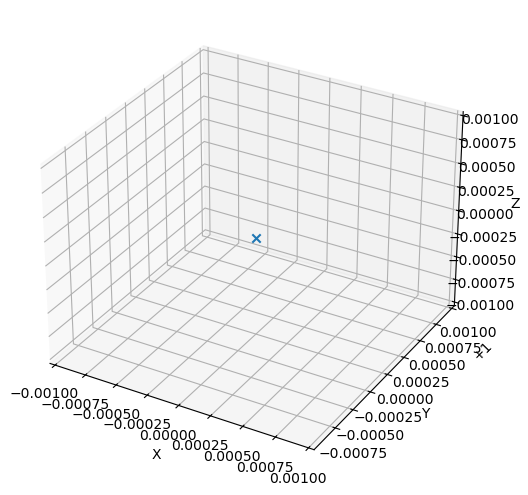

In [2]:
tensor1 = tensor([0,1,0], channel(vector='x,y,z'))
plot(tensor1)

<Figure size 1200x500 with 1 Axes>

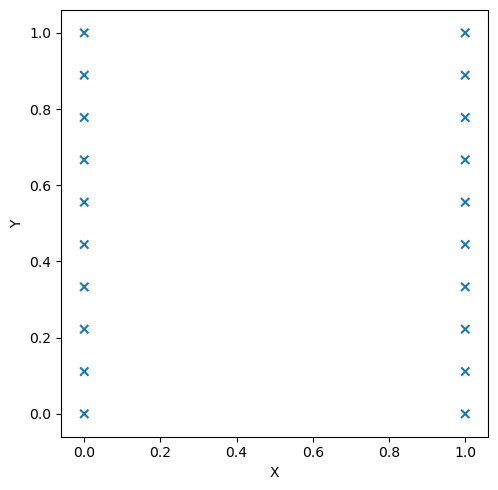

In [3]:
tensor2 = vec(x=tensor([0,1], instance(x=2)), y=math.linspace(0,1, instance(y=10)))
plot(tensor2)

<Figure size 1200x500 with 1 Axes>

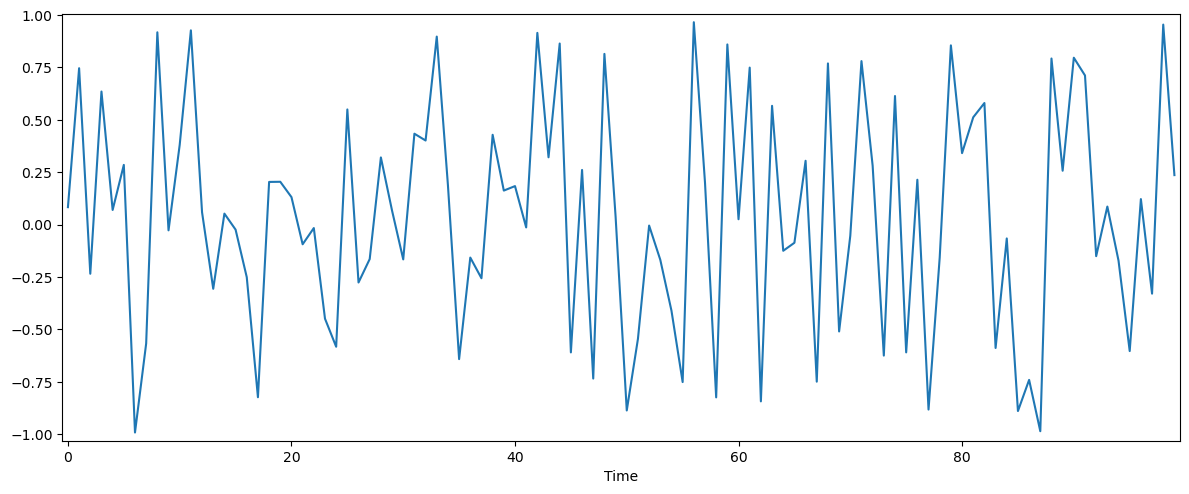

In [4]:
tensor3 = math.random_uniform(spatial(time=100), low=-1, high=1)
plot(tensor3)

<Figure size 1200x500 with 1 Axes>

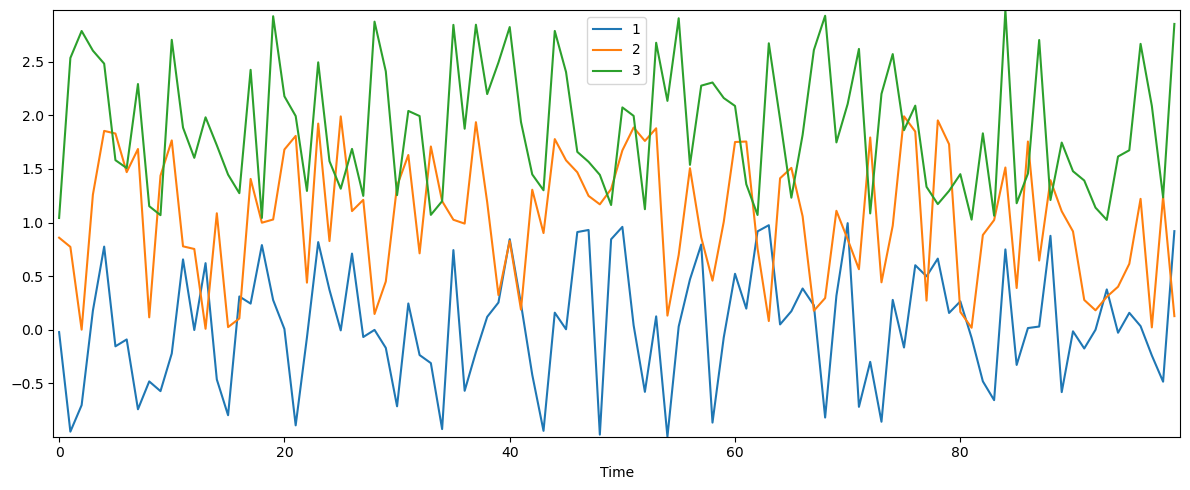

In [5]:
tensor4 = math.random_uniform(spatial(time=100), channel(curve='1,2,3'), low=-1, high=1) + (0, 1, 2)
plot(tensor4)

/home/matteot/anaconda3/envs/personal/lib/python3.12/site-packages/phi/field/_field.py:148: FutureWarning: Instance checks on PointCloud are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, PointCloud)


<Figure size 1200x500 with 2 Axes>

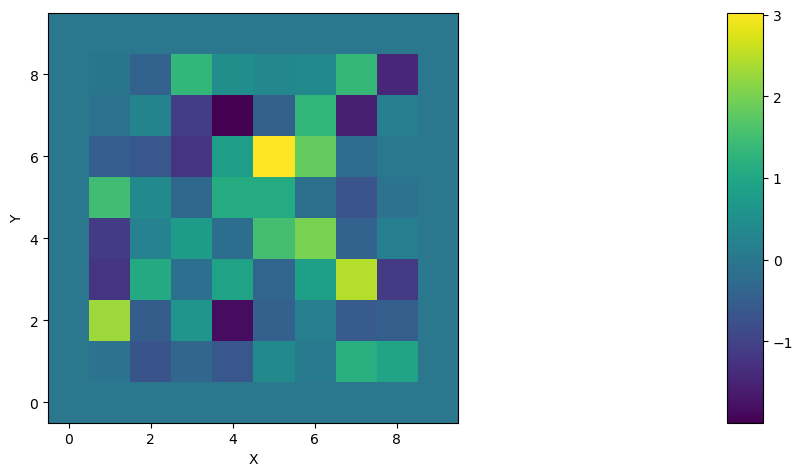

In [6]:
tensor5 = math.pad(math.random_normal(spatial(x=8, y=8)), dict(x=(1,1), y=(1,1)), 0)
plot(tensor5)

<Figure size 1200x500 with 6 Axes>

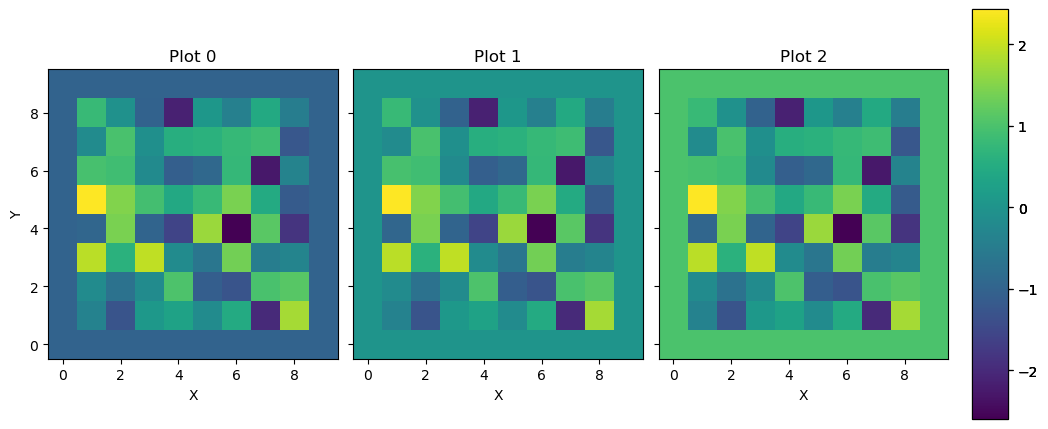

In [7]:
tensor6 = math.pad(math.random_normal(spatial(x=8, y=8)), dict(x=(1,1), y=(1,1)), tensor([-1,0,1], batch(plot=3)))
plot(tensor6)

# (2) Bouncing Balls Simulation

In [8]:
x0 = vec(x=0, y=1)
angles = math.linspace(0, math.pi / 2, batch(balls=10))

v0_abs = 3
v0 = vec(x=math.cos(angles), y=math.sin(angles)) * v0_abs

balls = PointCloud(Sphere(x0, radius=0.1), v0)

In [9]:
friction=0.7
elasticity=0.8

def sim_step(balls, dt=0.1):
    gravity=( 0, -9.81 * dt )
    friction_factor = friction ** dt
    balls *= math.where(balls.points.vector['y'] < 0, (1, -1), 1) * friction_factor
    return advect.points(balls, balls, dt) + gravity

In [10]:
simulation = iterate(sim_step, batch(t=100), balls)
plot(rename_dims(simulation.elements, 'balls', instance('balls')), animate='t')

/home/matteot/anaconda3/envs/personal/lib/python3.12/site-packages/phi/field/_field.py:142: FutureWarning: Instance checks on Grid are deprecated and will be removed in version 3.0. Use the methods instance.is_grid, instance.is_point_cloud, instance.is_centered and instance.is_staggered instead.
  return isinstance(self, Grid)


<Figure size 1200x500 with 1 Axes>

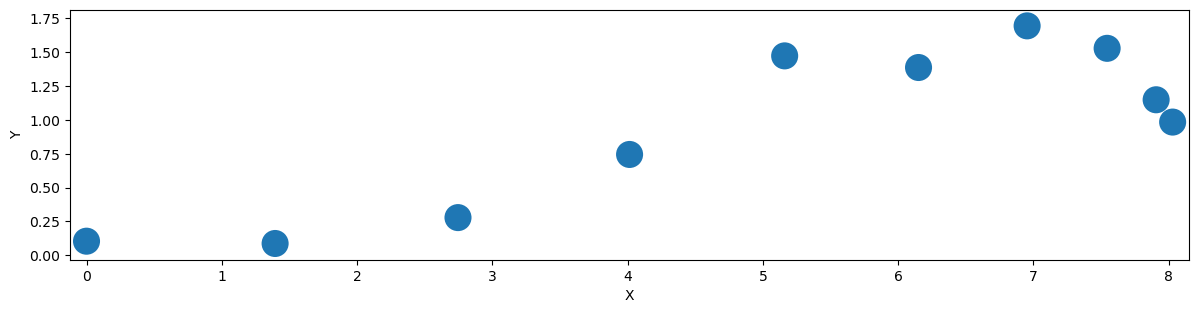

In [11]:
final_state = rename_dims(simulation.elements, 'balls', instance('balls')).unstack("t")[-1]
plot(final_state)